In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
from PIL import Image
import jiwer

In [10]:
df = pd.read_json('/leonardo_work/EUHPC_D02_014/data/text_recognition/Trolldomskommissionen3/gt_files/text_recognition_all_ori.jsonl', lines=True)
df.rename(columns={0: "filename", 1: "text"}, inplace=True)
train_df, test_df = train_test_split(df, test_size=0.1)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [14]:
class HTRDataset(Dataset):
    def __init__(self, root_dir, df, processor, max_target_length=184):
        self.root_dir = root_dir
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # get file name + text 
        file_name = self.df['filename'][idx]
        text = self.df['text'][idx]
        # prepare image (i.e. resize + normalize)
        image = Image.open(self.root_dir + file_name).convert("RGB")
        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(text, 
                                          padding="max_length", 
                                          max_length=self.max_target_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

In [ ]:
'/leonardo/home/userexternal/elenas00/projects/huggingface_htr/data'

In [12]:
from transformers import TrOCRProcessor

basepath = '/leonardo_work/EUHPC_D02_014/data/text_recognition/Trolldomskommissionen3/'

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
train_dataset = HTRDataset(root_dir=basepath,
                           df=train_df,
                           processor=processor)
eval_dataset = HTRDataset(root_dir=basepath,
                            df=test_df,
                           processor=processor)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/leonardo/home/userexternal/elenas00/projects/huggingface_htr/hf/lib/python3.10/site-packages/transformers/utils/import_utils.py", line 1282, in _get_module
    return importlib.import_module("." + module_name, self.__name__)
  File "/leonardo/prod/spack/03/ccsdeploy/spack_deploy/envs/cineca-ai-3/._view/n4cz2c6sex4fdqz4cjaaj36watqxvg32/lib/python3.10/importlib/__init__.py", line 126, in import_module
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/leonardo/home/userexternal/elenas00/projects/huggingface_htr/hf/lib/python3.10/site-packages/transformers/mode

In [13]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/leonardo/prod/spack/03/ccsdeploy/spack_deploy/envs/cineca-ai-3/._view/n4cz2c6sex4fdqz4cjaaj36watqxvg32/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
  File "/scratch_local/ipykernel_1929471/3459343849.py", line 1, in <module>
    print("Number of training examples:", len(train_dataset))
NameError: name 'train_dataset' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/leonardo/prod/spack/03/ccsdeploy/spack_deploy/envs/cineca-ai-3/._view/n4cz2c6sex4fdqz4cjaaj36watqxvg32/lib/python3.10/site-packages/pygments/styles/__init__.py", line 82, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/leonardo/prod/spack/03/ccsdeploy/spack_deploy/envs/cineca-ai-3/._view/n4cz2c6sex4fdqz4cjaaj36watq

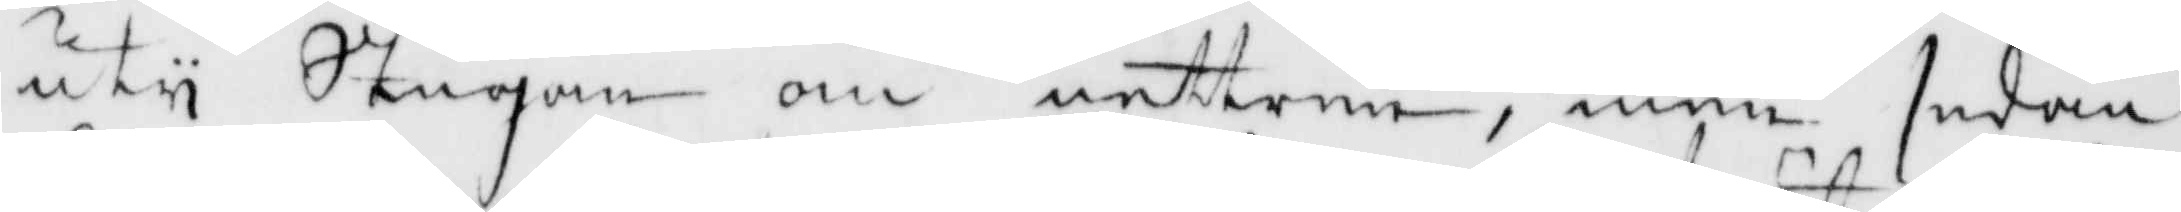

In [31]:
image = Image.open(train_dataset.root_dir + train_df['filename'][0]).convert("RGB")
image

In [32]:
encoding = train_dataset[0]
for k,v in encoding.items():
    print(k, v.shape)

labels = encoding['labels']
labels[labels == -100] = processor.tokenizer.pad_token_id
label_str = processor.decode(labels, skip_special_tokens=True)
print(label_str)

pixel_values torch.Size([3, 384, 384])
labels torch.Size([128])
uty sStugan om nettren, men sedan


In [15]:
from transformers import VisionEncoderDecoderModel

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-stage1")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/leonardo/prod/spack/03/ccsdeploy/spack_deploy/envs/cineca-ai-3/._view/n4cz2c6sex4fdqz4cjaaj36watqxvg32/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
  File "/scratch_local/ipykernel_1929471/501296829.py", line 3, in <module>
    model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-stage1")
  File "/leonardo/home/userexternal/elenas00/projects/huggingface_htr/hf/lib/python3.10/site-packages/transformers/models/vision_encoder_decoder/modeling_vision_encoder_decoder.py", line 363, in from_pretrained
    return super().from_pretrained(pretrained_model_name_or_path, *model_args, **kwargs)
  File "/leonardo/home/userexternal/elenas00/projects/huggingface_htr/hf/lib/python3.10/site-packages/transformers/modeling_utils.py", line 2507, in from_pretrained
    resolved_config_file = cached_file(
  File "/leonardo/home/userexternal/elenas00/projects/huggingface_htr/hf/lib/python3.10/site-package

In [7]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 64
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [8]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    fp16=True, 
    output_dir="/home/erik/Riksarkivet/Projects/huggingface_htr/models/tr_ocr_test",
    logging_dir="/home/erik/Riksarkivet/Projects/huggingface_htr/models/tr_ocr_test/tb",
    logging_steps=10,
    report_to='tensorboard',
    save_steps=1000,
    eval_steps=1000,
)

In [9]:
from datasets import load_metric

cer_metric = load_metric("cer")

/tmp/ipykernel_922156/152175726.py:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  cer_metric = load_metric("cer")


In [10]:
def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

In [11]:
from transformers import default_data_collator

trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)
trainer.train()

/home/erik/anaconda3/envs/huggingface/lib/python3.10/site-packages/transformers/models/trocr/processing_trocr.py:134: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(
/home/erik/anaconda3/envs/huggingface/lib/python3.10/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|          | 10/12558 [00:33<10:52:27,  3.12s/it]

{'loss': 8.2585, 'learning_rate': 4.9968147794234757e-05, 'epoch': 0.0}


  0%|          | 20/12558 [01:09<12:22:51,  3.55s/it]

{'loss': 6.7662, 'learning_rate': 4.9928332537028194e-05, 'epoch': 0.0}


  0%|          | 30/12558 [01:42<10:56:09,  3.14s/it]

{'loss': 6.1366, 'learning_rate': 4.9888517279821625e-05, 'epoch': 0.01}


  0%|          | 40/12558 [02:15<11:28:59,  3.30s/it]

{'loss': 5.7867, 'learning_rate': 4.984870202261507e-05, 'epoch': 0.01}


  0%|          | 50/12558 [02:49<12:17:11,  3.54s/it]

{'loss': 5.6527, 'learning_rate': 4.980888676540851e-05, 'epoch': 0.01}


  0%|          | 60/12558 [03:21<11:46:40,  3.39s/it]

{'loss': 5.5166, 'learning_rate': 4.9769071508201945e-05, 'epoch': 0.01}


  1%|          | 70/12558 [03:52<10:37:21,  3.06s/it]

{'loss': 5.194, 'learning_rate': 4.972925625099538e-05, 'epoch': 0.02}


  1%|          | 80/12558 [04:25<11:10:17,  3.22s/it]

{'loss': 5.0273, 'learning_rate': 4.968944099378882e-05, 'epoch': 0.02}
